# IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pip install ggplot

     |████████████████████████████████| 2.2MB 5.7MB/s 


In [3]:
from plotnine import *

In [4]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [109]:
cd "/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/HR"

/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/HR


In [110]:
ls

'Copie de Human Resources Department Skeleton'   Human_Resources.csv
'Copie de Human Resources Department Solution'


In [5]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/HR/Human_Resources.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [113]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# 35 features in total, each contains 1470 data points

#  VISUALIZE DATASET

### Categorical variables

In [6]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
df.Attrition = df.Attrition.map({'Yes':1,'No':0})
df.OverTime = df.OverTime.map({'Yes':1,'No':0})
df.Over18 = df.Over18.map({'Y':1,'N':0})

In [115]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [116]:
# Let's see if we have any missing data, luckily we don't!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [117]:
total = df.isnull().sum().sort_values(ascending=False)   # isnull sera True pour les NA donc sum() donne résultat
percent_1 = df.isnull().sum()/df.isnull().count()*100    # avec isnull() toutes les cell seront True ou False donc pas de NA => count() compte le nombre total de lignes alors que sum() seulement les True (si NA)
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
YearsWithCurrManager,0,0.0
EmployeeCount,0,0.0
JobLevel,0,0.0
JobInvolvement,0,0.0
HourlyRate,0,0.0
Gender,0,0.0
EnvironmentSatisfaction,0,0.0
EmployeeNumber,0,0.0
EducationField,0,0.0
JobSatisfaction,0,0.0


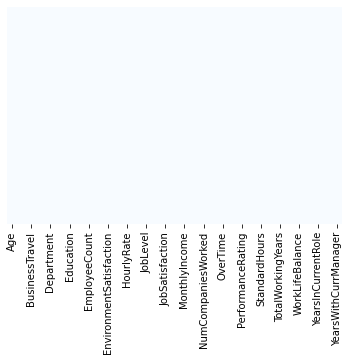

In [166]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

Let's look at the different variables. We see a few which are not useful or have just one value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1efe045fd0>,
      dtype=object)

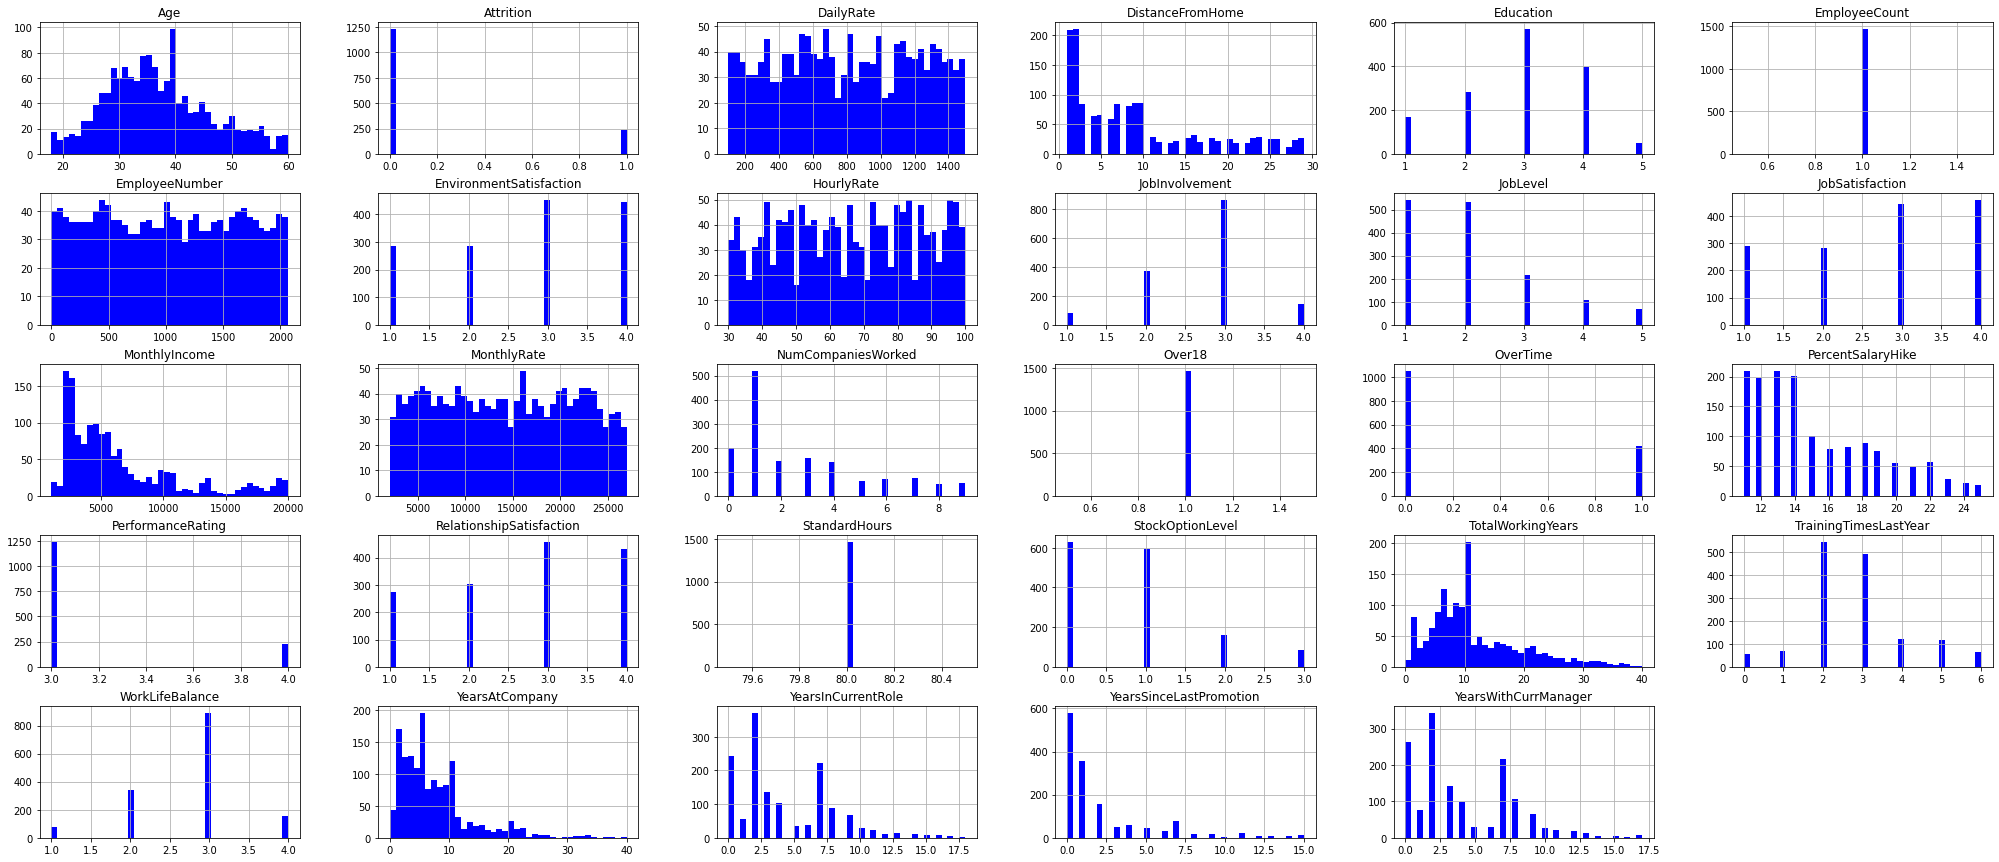

In [178]:
df.hist(bins=40, layout=(5,6), figsize=(35,15), color='b')

In [ ]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [7]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
df.drop(['EmployeeCount','StandardHours','EmployeeNumber', 'Over18'], axis=1,inplace=True)

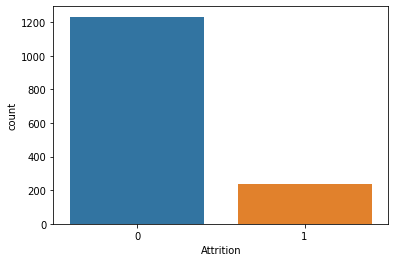

Number of employees who left in the dataset: 237 or 16% of the total


In [13]:
# Let's see how many employees left the company!
sns.countplot(data=df, x='Attrition')
plt.show()
print('Number of employees who left in the dataset:', df.Attrition.sum(),f'or {round(df.Attrition.sum()/df.Attrition.count()*100)}% of the total')

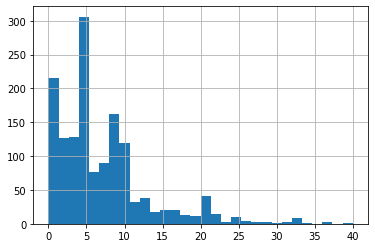

In [172]:
df.YearsAtCompany.hist(bins=30)

In [16]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
stayed=df[df.Attrition!=1]
print('Number of employees who did not leave in the dataset:', len(stayed),f'or {round(len(stayed)/df.Attrition.count()*100)}% of the total')

Number of employees who did not leave in the dataset: 1233 or 84% of the total


In [123]:
stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,1.0,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.0,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,1.0,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,1.0,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,1.0,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,1.0,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.0,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [17]:
left_df = df[df.Attrition==1]
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [125]:
comparison_df = df[['Attrition','Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel']]
comparison = comparison_df.groupby('Attrition').mean()
comparison

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,StockOptionLevel
Attrition,,,,,,
0,37.561233,812.504461,8.915653,2.771290,2.778589,0.845093
1,33.607595,750.362869,10.632911,2.464135,2.468354,0.527426


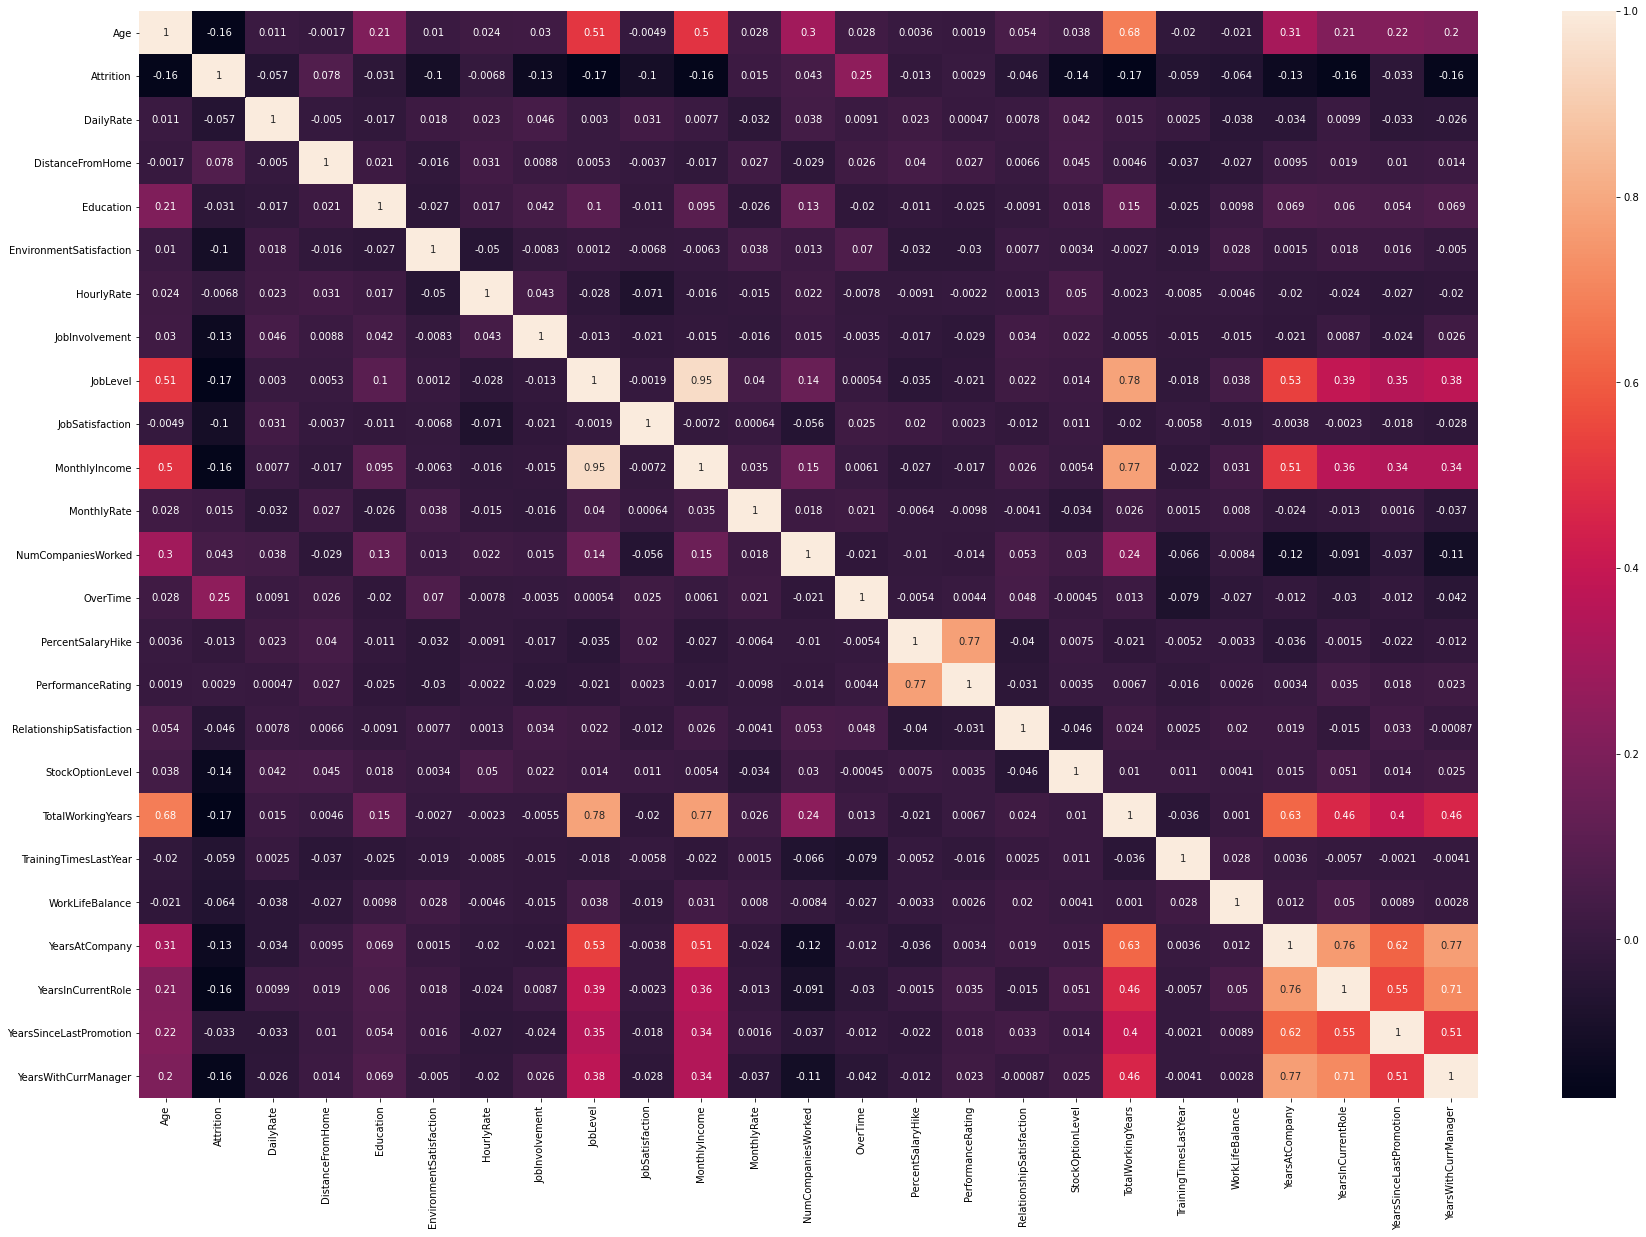

In [188]:

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income
correlations = df.corr()
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(correlations, annot=True)

Looking at age, peak of departures around 30

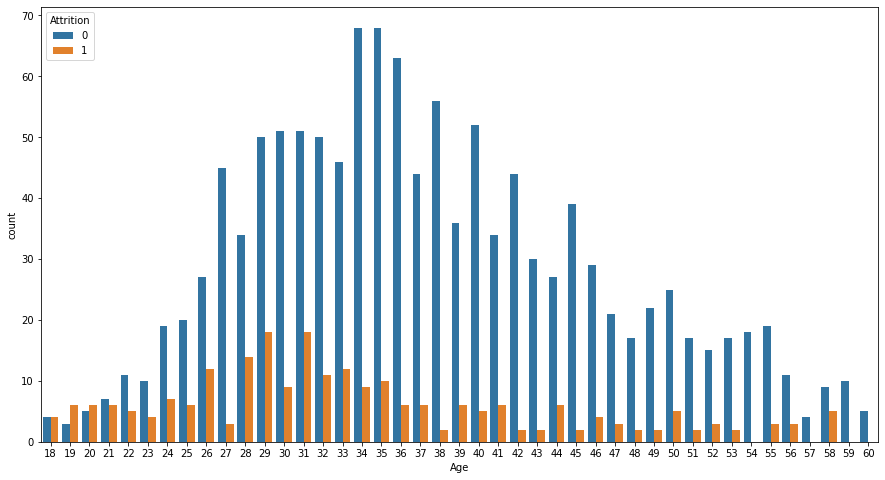

In [189]:
plt.figure(figsize=(15,8))
sns.countplot(x='Age', hue='Attrition', data=df)

In [130]:
# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job. The turnover on Sales Rep is very high as shown below
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

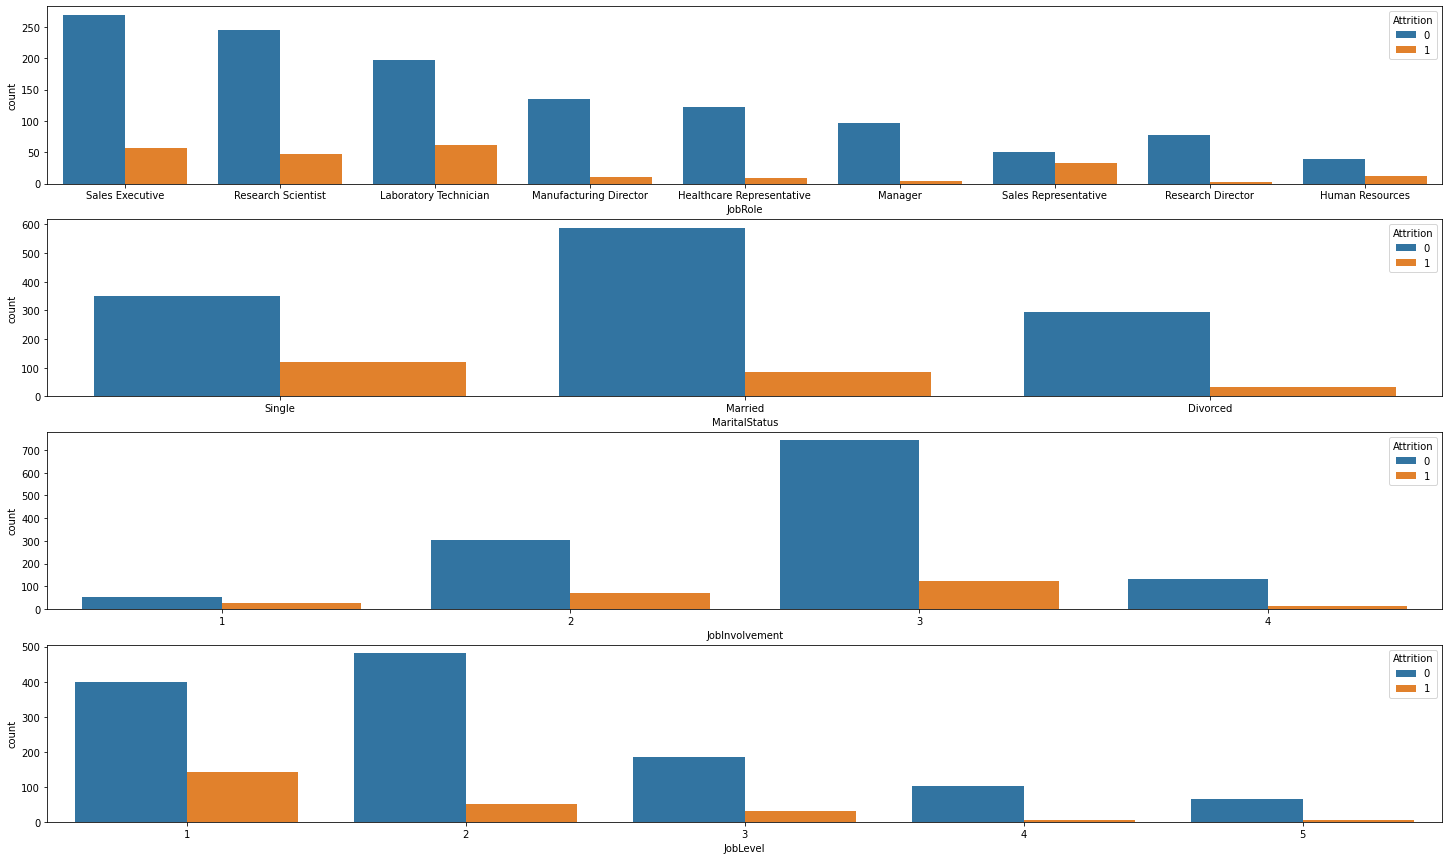

In [193]:
plt.figure(figsize=(25,15))
plt.subplot(411)  # 4 rows x 1 column
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=df)

In [131]:
# Single employees tend to leave compared to married and divorced
marital_status = df[['MaritalStatus', 'Attrition']]
left_by_marital_status = marital_status.groupby('MaritalStatus').sum()
count_by_status = marital_status.groupby('MaritalStatus').count()
table = pd.DataFrame({'Left':left_by_marital_status.Attrition, 'Population': count_by_status.Attrition, '% ratio': round((left_by_marital_status.Attrition/count_by_status.Attrition)*100,0)})
print(table)

               Left  Population  % ratio
MaritalStatus                           
Divorced         33         327     10.0
Married          84         673     12.0
Single          120         470     26.0


In [132]:
# Sales Representitives tend to leave compared to any other job 
functions = df[['Department', 'Attrition']]
left_by_functions = functions.groupby('Department').sum()
count_by_functions = functions.groupby('Department').count()
table = pd.DataFrame({'Left':left_by_functions.Attrition, 'Population': count_by_functions.Attrition, '% ratio': round((left_by_functions.Attrition/count_by_functions.Attrition)*100,0)})
print(table)

                        Left  Population  % ratio
Department                                       
Human Resources           12          63     19.0
Research & Development   133         961     14.0
Sales                     92         446     21.0


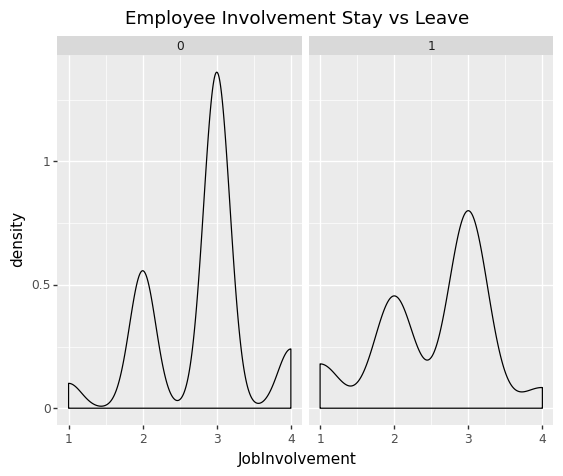

<ggplot: (-9223363301152783907)>

In [133]:
# Less involved employees tend to leave the company 
ggplot(df, aes('JobInvolvement')) + geom_density() + facet_wrap('Attrition') + ggtitle('Employee Involvement Stay vs Leave')

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


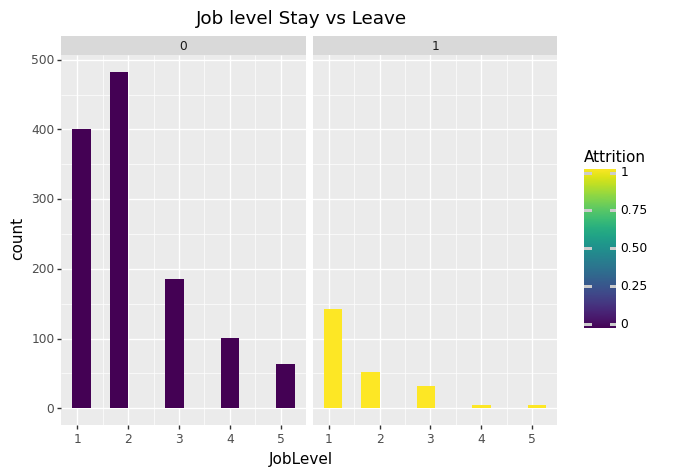

<ggplot: (8735693665330)>

In [134]:
# Less experienced (low job level) tend to leave the company 
ggplot(df, aes('JobLevel',fill='Attrition')) + geom_histogram() + facet_wrap('Attrition') + ggtitle('Job level Stay vs Leave')

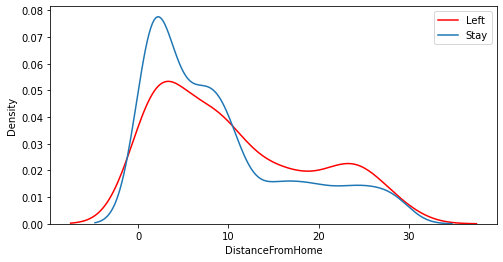

In [200]:
plt.figure(figsize=(8,4))
sns.kdeplot(left_df.DistanceFromHome, label='Left', color='r')
sns.kdeplot(stayed.DistanceFromHome, label='Stay')
plt.legend()

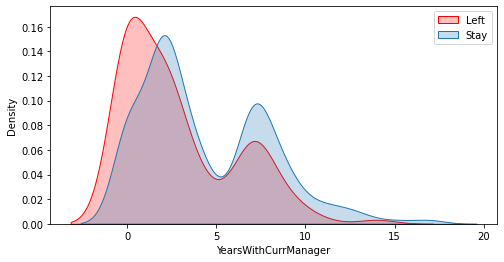

In [201]:
plt.figure(figsize=(8,4))
sns.kdeplot(left_df.YearsWithCurrManager, label='Left', shade=True, color='r')
sns.kdeplot(stayed.YearsWithCurrManager, label='Stay', shade=True)
plt.legend()
plt.show()

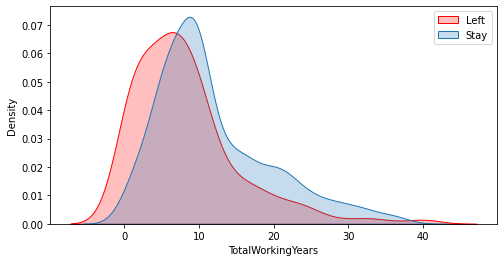

In [202]:
plt.figure(figsize=(8,4))
sns.kdeplot(left_df.TotalWorkingYears, label='Left', shade=True, color='r')
sns.kdeplot(stayed.TotalWorkingYears, label='Stay', shade=True)
plt.legend()
plt.show()

- Women get higher salary than men in average

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


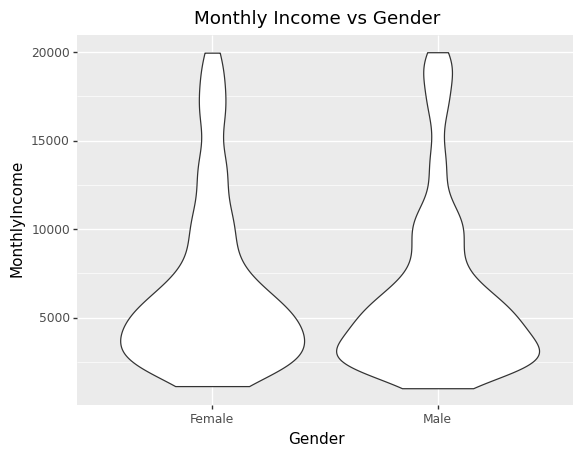

<ggplot: (8735693665309)>

In [135]:
# Let's see the Gender vs. Monthly Income
ggplot(df, aes('Gender','MonthlyIncome')) + geom_violin() + ggtitle('Monthly Income vs Gender')

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


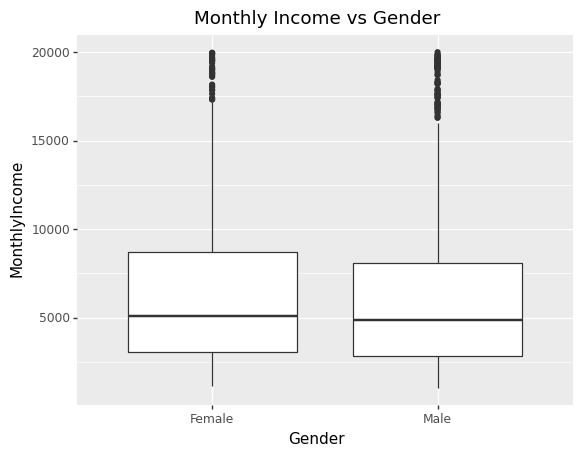

<ggplot: (-9223363301170093757)>

In [213]:
ggplot(df, aes('Gender','MonthlyIncome')) + geom_boxplot() + ggtitle('Monthly Income vs Gender')

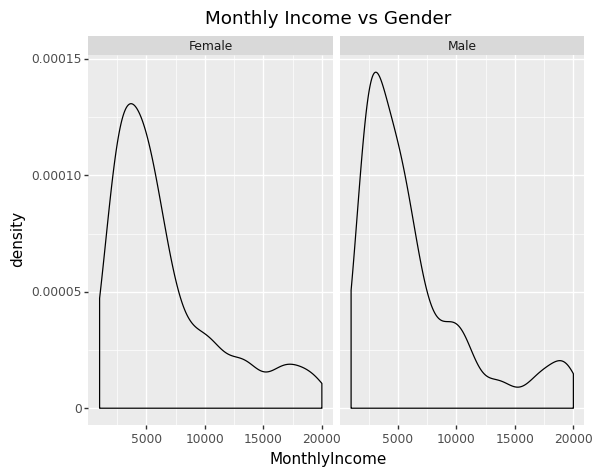

<ggplot: (-9223363301160993620)>

In [137]:
# Let's see the Gender vs. Monthly Income
ggplot(df, aes('MonthlyIncome')) + geom_density() + facet_wrap('Gender') + ggtitle('Monthly Income vs Gender')

Sales Reps have very little pay which could explain the very high turnover in this function

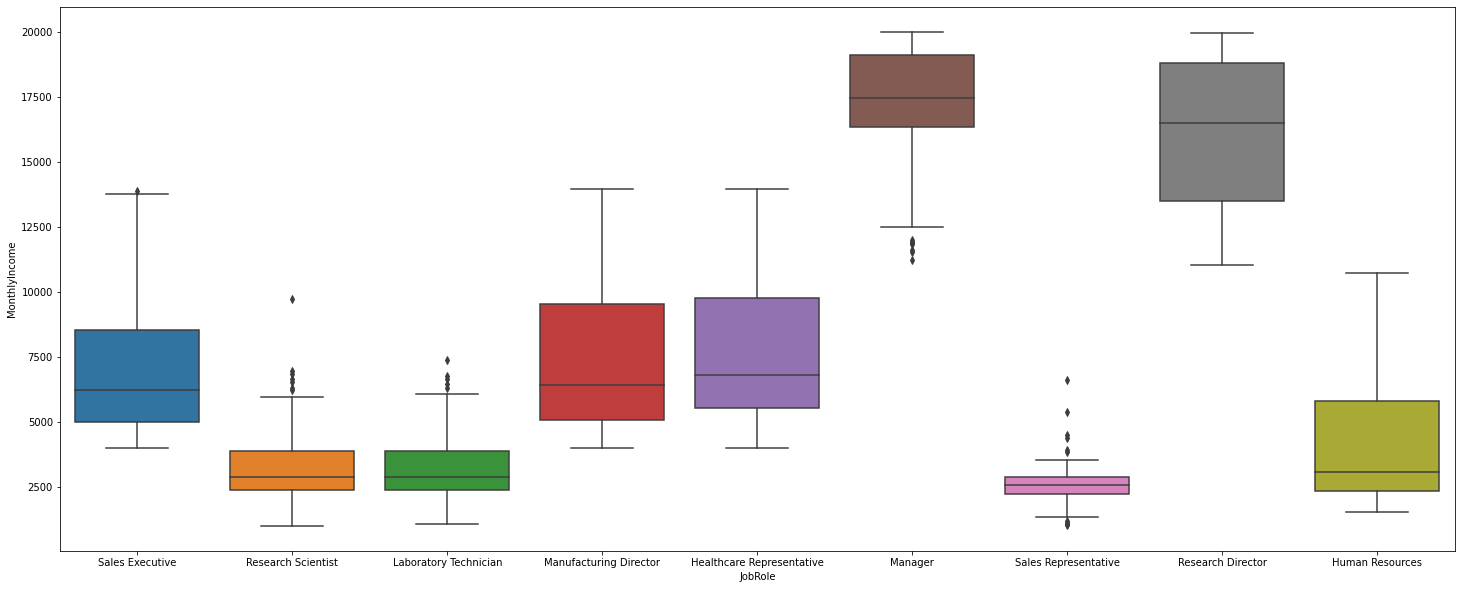

In [217]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome')


# CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [18]:
from sklearn.model_selection import train_test_split

Isolate the Response variable

In [20]:
# note that we dropped the target 'Atrittion'
y = df.Attrition
df.drop(['Attrition'], axis=1, inplace=True)

One-Hot encode the categorical variables

In [16]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [21]:
dummies = pd.get_dummies(df, columns=['BusinessTravel','Department','EducationField','JobRole', 'Gender', 'MaritalStatus'],prefix='OH')
dummies

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OH_Non-Travel,OH_Travel_Frequently,OH_Travel_Rarely,OH_Human Resources,OH_Research & Development,OH_Sales,OH_Human Resources,OH_Life Sciences,OH_Marketing,OH_Medical,OH_Other,OH_Technical Degree,OH_Healthcare Representative,OH_Human Resources,OH_Laboratory Technician,OH_Manager,OH_Manufacturing Director,OH_Research Director,OH_Research Scientist,OH_Sales Executive,OH_Sales Representative,OH_Female,OH_Male,OH_Divorced,OH_Married,OH_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


# Normalize the data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(dummies)
x_normalized

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.25, random_state=0, shuffle = True)

In [22]:
x_train

array([[0.23809524, 0.98353615, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.30952381, 0.84037223, 0.03571429, ..., 1.        , 0.        ,
        0.        ],
       [0.73809524, 0.99355762, 0.21428571, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.5952381 , 0.77093772, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.47619048, 0.11882606, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.52380952, 0.39799571, 0.32142857, ..., 1.        , 0.        ,
        0.        ]])

In [23]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
x_train.shape

(1102, 50)

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [25]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = model.predict(x_test)

In [ ]:
# Testing Set Performance

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
print('accuracy:', round(accuracy_score(y_test,y_pred)*100,3),'%')

accuracy: 89.13 %


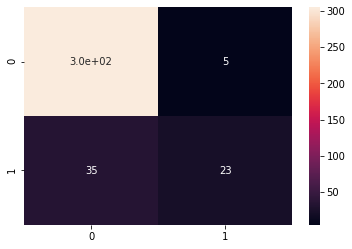

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

Evaluation of our classifier:
- Overall accuracy of 89%
- However the F1-score is only 0.53 for quiting employees. For this category, we correctly classify 23 and misclassify 35 as false positives
- the model performs way better on the majority class (stay)
- All in all, looking at our objective to identify leavers, the model does not perform well at identifying leavers
- **We know the dataset is highly skewed. Due to the imbalance, a basic model predicting all employees as 'no leaver' would achieve an accuracy of 84% (only 16% are 'leavers' in the dataset). This explains high accuracy score but poor F1 score**.

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.82      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.89      0.89      0.87       368



**Let's retrain the model using class_weight parameter to minimize the imbalance dataset issue.**

In [37]:
model = LogisticRegression(max_iter=200, solver='newton-cg', class_weight='balanced')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('accuracy:', round(accuracy_score(y_test,y_pred)*100,3),'%')

accuracy: 78.261 %


When passing balanced as class_weight, this results in the values of y (label) to automatically adjust weights inversely proportional to class frequencies in the input data. The same can be calculated as n_samples / (n_classes * np.bincount(y))

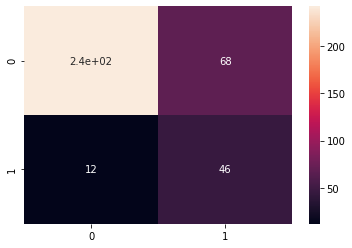

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       310
           1       0.40      0.79      0.53        58

    accuracy                           0.78       368
   macro avg       0.68      0.79      0.70       368
weighted avg       0.87      0.78      0.81       368



**We have significantly improved the model detection of true 'leavers'** but we now have much more false positives, ie employees detected as potential 'leavers' when they are not

Let's try with SMOTE approach to expand the dataset. SMOTE (Synthetic Minority Over-sampling Technique) is the Generation of synthetic training examples – One of the most widely used algorithm for synthetic training examples.

In [41]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0,sampling_strategy=0.4)
smote_train, smote_target = oversampler.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
model = LogisticRegression(max_iter=200, solver='newton-cg', class_weight='balanced')
model.fit(smote_train, smote_target)
y_pred = model.predict(x_test)
print('accuracy:', round(accuracy_score(y_test,y_pred)*100,3),'%')

accuracy: 79.076 %


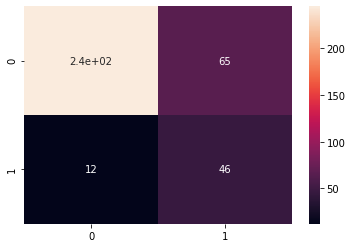

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       310
           1       0.41      0.79      0.54        58

    accuracy                           0.79       368
   macro avg       0.68      0.79      0.70       368
weighted avg       0.87      0.79      0.81       368



Overall the benefit of SMOTE is limited

**Let's try to find the best weight parameters with GridSearch**

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.9s finished
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

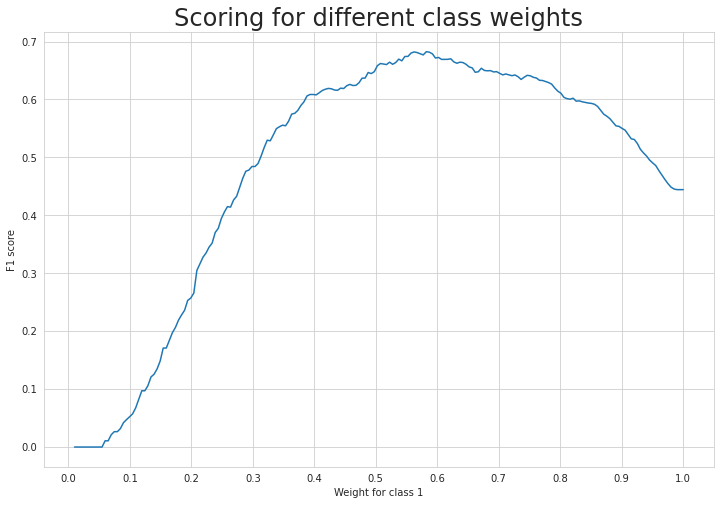

In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, param_grid= param_grid, cv=StratifiedKFold(), 
                          n_jobs=-1, scoring='f1', verbose=2).fit(smote_train, smote_target)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [62]:
gridsearch.best_params_

{'class_weight': {0: 0.41788944723618093, 1: 0.5821105527638191}}

In [63]:
model = LogisticRegression(max_iter=200, solver='newton-cg', class_weight=gridsearch.best_params_['class_weight'])
model.fit(smote_train, smote_target)
y_pred = model.predict(x_test)
print('accuracy:', round(accuracy_score(y_test,y_pred)*100,3),'%')

accuracy: 85.598 %


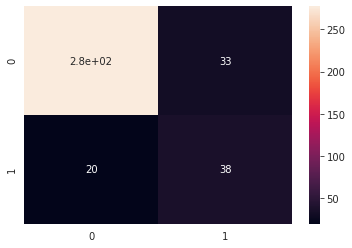

In [64]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       310
           1       0.54      0.66      0.59        58

    accuracy                           0.86       368
   macro avg       0.73      0.77      0.75       368
weighted avg       0.87      0.86      0.86       368



**Using SMOTE and optimized weight parameters for F1 score, the model is able to classify the majority class very well, and gets passable results on the minority class, although with F1 score 6pts higher than the very first attempt**.

# TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

We continue to use SMOTE and weight correction

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(class_weight='balanced_subsample')
rfm.fit(smote_train, smote_target)
y_pred_rf = rfm.predict(x_test)

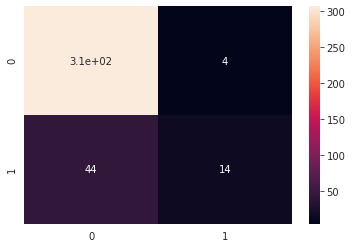

In [86]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True )
plt.show()

In [76]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       310
           1       0.82      0.24      0.37        58

    accuracy                           0.87       368
   macro avg       0.85      0.62      0.65       368
weighted avg       0.87      0.87      0.84       368



Here again the perfromance of the classifier is disappointing with an F1-score of 0.37 on leavers and a poor recall of 0.24.
- This is reflected in the confusion matrix where the large majority of true positives (true leavers) are classified as staying

# TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [87]:
import tensorflow as tf

In [122]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation ='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation ='relu'))
model.add(tf.keras.layers.Dense(units=500, activation ='relu'))
model.add(tf.keras.layers.Dense(units=1, activation ='sigmoid'))

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(x_train,y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 0.0948 - accuracy: 0.9648
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0261 - accuracy: 0.9921
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9947
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0199 - accuracy: 0.9971
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 0.9994
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 8.1974e-04 - accuracy: 1.0000
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 5.9522e-04 - accuracy: 1.0000
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 3.6171e-04 - accuracy: 1.0000
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 2.1524e-04 - accuracy: 

In [68]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

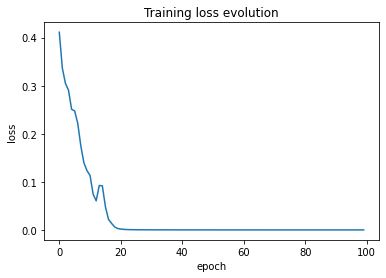

In [280]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss evolution')
plt.show()

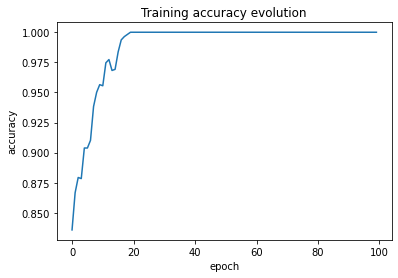

In [281]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training accuracy evolution')
plt.show()

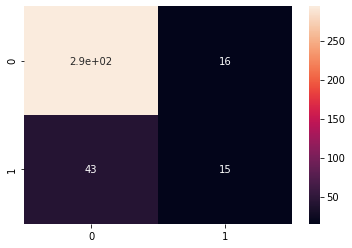

In [69]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       310
           1       0.48      0.26      0.34        58

    accuracy                           0.84       368
   macro avg       0.68      0.60      0.62       368
weighted avg       0.81      0.84      0.82       368



Let's try using SMOTE

In [100]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0,sampling_strategy=0.4)
smote_train, smote_target = oversampler.fit_sample(x_train, y_train)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='AUC')
history = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 1.0131e-07 - auc: 1.0000
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 1.3662e-07 - auc: 1.0000
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0233 - auc: 0.9987
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0768 - auc: 0.9906
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0275 - auc: 0.9988
Epoch 6/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0043 - auc: 1.0000
Epoch 7/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0013 - auc: 1.0000
Epoch 8/100
26/26 [==============================] - 0s 9ms/step - loss: 4.6629e-05 - auc: 1.0000
Epoch 9/100
26/26 [==============================] - 0s 9ms/step - loss: 3.4421e-05 - auc: 1.0000
Epoch 10/100
26/26 [==============================] - 0s 9ms/step - loss: 2.9326e-05 - auc: 1.0000
Epoch 11/100
26/26 [================

In [101]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

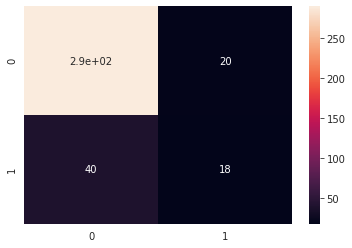

In [102]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [103]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       310
           1       0.47      0.31      0.38        58

    accuracy                           0.84       368
   macro avg       0.68      0.62      0.64       368
weighted avg       0.81      0.84      0.82       368



**Let's now adjust weights for the class imbalance**

In [123]:
stay, leave = np.bincount(y)
total_count = len(y)
weight_stay = (1 / stay) * (total_count) / 2.0
weight_leave = (1 / leave) * (total_count) / 2.0
class_weights = {0: weight_stay, 1: weight_leave}

In [124]:
class_weights

{0: 0.5961070559610706, 1: 3.10126582278481}

In [128]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='AUC')
history = model.fit(x_train, y_train, epochs = 50, batch_size = 50, class_weight=class_weights)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: 0.0086 - auc: 0.9999
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0572 - auc: 0.9996
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0125 - auc: 0.9999
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0129 - auc: 0.9992
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0490 - auc: 0.9965
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0417 - auc: 0.9993
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0230 - auc: 0.9996
Epoch 8/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0287 - auc: 0.9995
Epoch 9/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0301 - auc: 0.9988
Epoch 10/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0221 - auc: 0.9995
Epoch 11/50
23/23 [==============================] - 0s 9ms/step - 

In [129]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

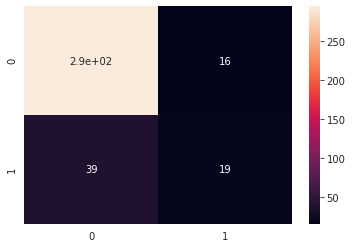

In [130]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       310
           1       0.45      0.31      0.37        58

    accuracy                           0.83       368
   macro avg       0.66      0.62      0.64       368
weighted avg       0.81      0.83      0.82       368



# CONCLUSION

From all options, the better results were achieved with Logistic Regression Classifier using SMOTE and adjusted weights to counter the class imbalance
- Optimal adjusted weights are found using GridSearch optimizing F1 score
- Performance must be defined depending on the objective. Higher true positive detection will also lead to higher false positives.
- Best performance was 0.59 F1 score, yielding 66% detection on the true positive
- To improve the model further, features should be enriched with new indicators very relevant to the classification task.